# Spotify ML Project (2010-2019)

### Data preparation for Machine Learning Project

In [1]:
import pandas as pd

raw_data = None

def get_data():
    global raw_data
    if raw_data is None:
        try:
            raw_data = pd.read_csv('top10s.csv', encoding = "ISO-8859-1")
            raw_data = raw_data.drop(['Index', 'Year'], axis=1)

        except:
            print("The file is not found")
    return raw_data



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler

import dataset
data = dataset.get_data()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        603 non-null    int64 
 1   Track.Name        603 non-null    object
 2   Artist.Name       603 non-null    object
 3   Genre             603 non-null    object
 4   year              603 non-null    int64 
 5   Beats.Per.Minute  603 non-null    int64 
 6   Energy            603 non-null    int64 
 7   Danceability      603 non-null    int64 
 8   Loudness..dB..    603 non-null    int64 
 9   Liveness          603 non-null    int64 
 10  Valence           603 non-null    int64 
 11  Length            603 non-null    int64 
 12  Acousticness      603 non-null    int64 
 13  Speechiness       603 non-null    int64 
 14  Popularity        603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


#### Print & Describe data frame, output it as csv file


In [5]:
print(data.shape)
print(data.describe())
x = data.describe()
x.to_csv('top10s_describe.csv')

(603, 15)
       Unnamed: 0         year  Beats.Per.Minute      Energy  Danceability  \
count  603.000000   603.000000        603.000000  603.000000    603.000000   
mean   302.000000  2014.592040        118.545605   70.504146     64.379768   
std    174.215384     2.607057         24.795358   16.310664     13.378718   
min      1.000000  2010.000000          0.000000    0.000000      0.000000   
25%    151.500000  2013.000000        100.000000   61.000000     57.000000   
50%    302.000000  2015.000000        120.000000   74.000000     66.000000   
75%    452.500000  2017.000000        129.000000   82.000000     73.000000   
max    603.000000  2019.000000        206.000000   98.000000     97.000000   

       Loudness..dB..    Liveness     Valence      Length  Acousticness  \
count      603.000000  603.000000  603.000000  603.000000    603.000000   
mean        -5.578773   17.774461   52.225539  224.674959     14.326700   
std          2.798020   13.102543   22.513020   34.130059     

#### DATA EXPLORATION:
exploring the popularity level to normalize the data afterwards.

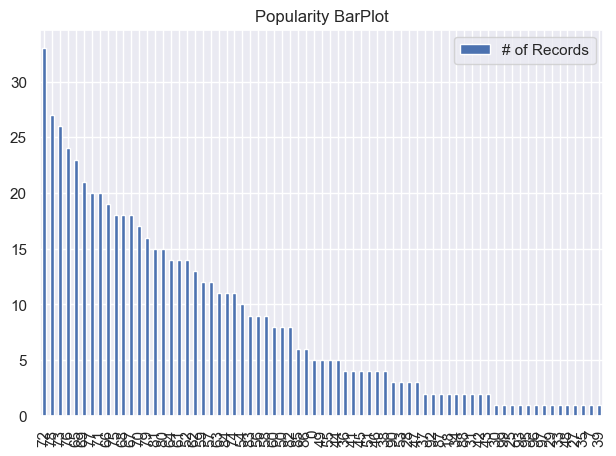

In [6]:
#Bar plot

data['Popularity'].value_counts().plot(kind="bar")
plt.title('Popularity BarPlot')
plt.legend(['# of Records'])
# plt.figure(figsize=(20, 3))
plt.tight_layout(pad=1.3,h_pad=100.0,w_pad=20.0)

plt.show()

C:\Users\idan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


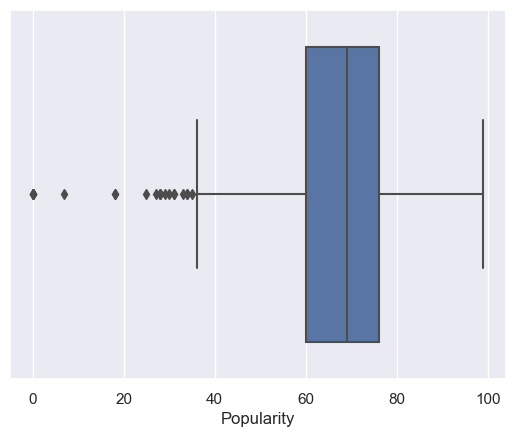

In [7]:
#BoxPlot 

sns.boxplot(data['Popularity'])
plt.xlabel('Popularity')
plt.show()

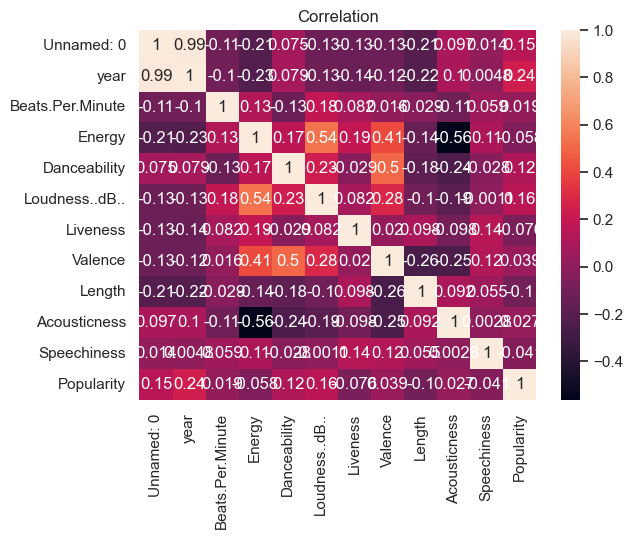

In [8]:
# Correlation cheak by heatmap
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation')
plt.show()

In [9]:
#Dropping duplicated records:

data.drop_duplicates(inplace=True)
print(data.isnull().sum())
print('______________')
print(data.dtypes)

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
year                0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64
______________
Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
year                 int64
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object


In [10]:
conditions = [
    (data['Popularity']<=70),
    (data['Popularity']>70)
              ]
choices = [0,1]
data['pop_level']=np.select(conditions,choices)

In [11]:
data['Beats.Per.Minute'] = (data['Beats.Per.Minute']) / (data['Beats.Per.Minute'].max())
data['Energy'] = (data['Energy']) / (data['Energy'].max())
data['Danceability'] = (data['Danceability']) / (data['Danceability'].max())
data['Loudness..dB..'] = (data['Loudness..dB..']) / (data['Loudness..dB..'].min())
data['Liveness'] = (data['Liveness']) / (data['Liveness'].max())
data['Valence'] = (data['Valence']) / (data['Valence'].max())
data['Length'] = (data['Length']) / (data['Length'].max())
data['Acousticness..'] = (data['Acousticness']) / (data['Acousticness'].max())
data['Speechiness.'] = (data['Speechiness']) / (data['Speechiness'].max())

In [12]:
print(data)

     Unnamed: 0                                         Track.Name  \
0             1                                   Hey, Soul Sister   
1             2                               Love The Way You Lie   
2             3                                            TiK ToK   
3             4                                        Bad Romance   
4             5                               Just the Way You Are   
..          ...                                                ...   
598         599                Find U Again (feat. Camila Cabello)   
599         600      Cross Me (feat. Chance the Rapper & PnB Rock)   
600         601  No Brainer (feat. Justin Bieber, Chance the Ra...   
601         602    Nothing Breaks Like a Heart (feat. Miley Cyrus)   
602         603                                   Kills You Slowly   

          Artist.Name    Genre  year  Beats.Per.Minute    Energy  \
0               Train      Pop  2010          0.470874  0.908163   
1              Eminem  

In [13]:
data_with_dummies = pd.get_dummies(data,columns=['Track.Name','Artist.Name','Genre'],drop_first=True)
print(data_with_dummies.head())

   Unnamed: 0  year  Beats.Per.Minute    Energy  Danceability  Loudness..dB..  \
0           1  2010          0.470874  0.908163      0.690722        0.066667   
1           2  2010          0.422330  0.948980      0.773196        0.083333   
2           3  2010          0.582524  0.857143      0.783505        0.050000   
3           4  2010          0.577670  0.938776      0.721649        0.066667   
4           5  2010          0.529126  0.857143      0.659794        0.083333   

   Liveness   Valence    Length  Acousticness  ...  Genre_Dance  Genre_EDM  \
0  0.108108  0.816327  0.511792            19  ...            0          0   
1  0.702703  0.653061  0.620283            24  ...            0          0   
2  0.391892  0.724490  0.471698            10  ...            0          0   
3  0.108108  0.724490  0.695755             0  ...            0          0   
4  0.121622  0.438776  0.521226             2  ...            0          0   

   Genre_Electronic  Genre_Hip-Hop  Genre_In

In [14]:
scaled_data = data_with_dummies.copy()

In [15]:
inputs = scaled_data.drop(['pop_level','Popularity'],axis=1)
targets = scaled_data['pop_level']

#### Dividing data to train and test

In [16]:
# divide the data to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,targets,test_size=0.2, random_state=9)

In [17]:
print(y_train)
print("______________________________________")
print(y_test)

346    0
327    0
309    0
462    1
170    0
      ..
125    0
56     1
501    0
348    0
382    1
Name: pop_level, Length: 482, dtype: int32
______________________________________
339    0
251    0
444    1
72     0
98     0
      ..
537    1
331    0
387    1
123    1
408    0
Name: pop_level, Length: 121, dtype: int32


#### Forest Tree - Decision tree algoritym

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
rfc = RandomForestClassifier(500)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [20]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[53 10]
 [29 29]]
              precision    recall  f1-score   support

           0       0.65      0.84      0.73        63
           1       0.74      0.50      0.60        58

    accuracy                           0.68       121
   macro avg       0.69      0.67      0.66       121
weighted avg       0.69      0.68      0.67       121



#### KNN algoritym

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [22]:
# K-neighbors 1-10
model_range = list(range(1,15))
model_score = []
for k in model_range:
     model = KNeighborsClassifier(n_neighbors=k)
     model.fit(x_train,y_train)
     y_pred = model.predict(x_test)
     score = metrics.accuracy_score(y_test,y_pred)
     model_score.append(score)
optimal_k = model_range[model_score.index((max(model_score)))]

C:\Users\idan\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\idan\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [23]:
acc = str(round(max(model_score)*100,2)) + '%'
print('Best K: {}, Best accuracy: {}'.format(optimal_k,acc))

Best K: 7, Best accuracy: 93.39%


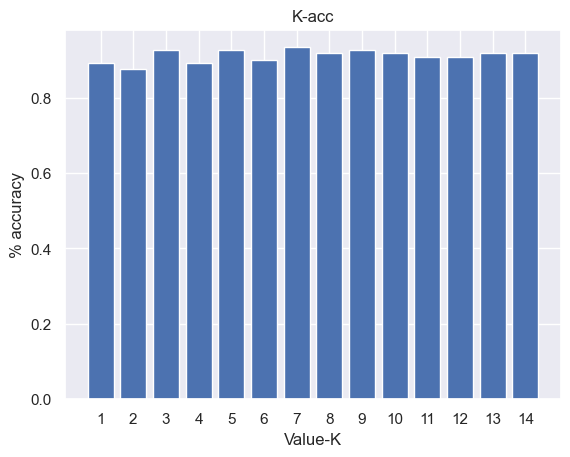

In [24]:
plt.bar(model_range,model_score)
plt.xticks(np.arange(1,15,step = 1))
plt.title('K-acc')
plt.xlabel('Value-K')
plt.ylabel('% accuracy')
plt.show()

In [25]:
# Confuision Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))

[[59  4]
 [ 6 52]]
